In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = "../data/08062025_IF_scan"
if_data_files = ["Cell.csv"]

columns = ["WellId", "CircTotalIntenCh2", "CircTotalIntenCh3"]

column_to_stain = dict(zip(range(1,13), ["pSTAT"]*6 + ["tSTAT"] * 6))
column_to_stain = dict(zip(range(1,13), ["pSTAT"]*12))

row_to_patient = {
    #"A":626,
	"B":626,
	"C":626,
	"D":617,
	"E":617,
	"F":617,
	"G":617,
	"H":617
}	

column_to_t_pts = {
	#1:"0",
    #2:"0",
	3:"0",
	4:"0",
	5:"20",
	6:"40",
	7:"0",
    8:"0",
	9:"20",
	10:"40",
	#11:"60",
	#12:"90"
}

row_to_replicate = {
    #"A":1,
    "B":1,
    "C":1,
    "D":1,
    "E":2,
    "F":1,
    "G":2,
    "H":1    
}

drug_to_row = {
	"B":"Control",
	"C":np.nan,
 	"D":"Control",
	"E":"1nM Fedratinib",
	"F":"10nM Fedratinib",
	"G":"1nM Filgotinib",
	"H":"10nM Filgotinib"
}


In [32]:
dfs = []
for fname in if_data_files:
	full_fname = f"{data_dir}/{fname}"
	df = pd.read_csv(full_fname, usecols=columns)

	stat1_means = df.groupby("WellId")["CircTotalIntenCh2"].mean()
	stat1_sems = df.groupby("WellId")["CircTotalIntenCh2"].sem()
	stat3_means = df.groupby("WellId")["CircTotalIntenCh3"].mean()
	stat3_sems = df.groupby("WellId")["CircTotalIntenCh3"].sem()

	stat_df = pd.concat([stat1_means, stat1_sems, stat3_means, stat3_sems], axis=1)
	stat_df.columns = ["STAT1 Mean", "STAT1 SEM", "STAT3 Mean", "STAT3 SEM"]
	stat_df.index = [x.strip() for x in stat_df.index]
	# Assign various characteristics based on wells using the dictionaries above
	rows = [x.strip()[0] for x in stat_df.index.values]
	cols = [int(x.strip()[1:]) for x in stat_df.index.values]
	stat_df["STAT"] = [column_to_stain[x] for x in cols]
	stat_df["PatientId"] = [row_to_patient[x] for x in rows]
	stat_df["IL-6 Concentration"] = ["10 ng/mL" for x in cols]
	stat_df["Time"] = [column_to_t_pts[x] for x in cols]
	stat_df["Replicate"] = [row_to_replicate[x] for x in rows]
	stat_df["JAK Inhibitor"] = [drug_to_row[x] for x in rows]
	stat_df["Column"] = cols
	stat_df.loc[[f"C0{i}" for i in [3,4,5,6]], "JAK Inhibitor"] = "1nM Fedratinib"
	stat_df.loc[[f"C{i:02d}" for i in [7,8,9,10]], "JAK Inhibitor"] = "10nM Fedratinib"
	display(stat_df)
	dfs.append(stat_df)

,STAT1 Mean,STAT1 SEM,STAT3 Mean,STAT3 SEM,STAT,PatientId,IL-6 Concentration,Time,Replicate,JAK Inhibitor,Column
B03,5.634233e+06,160700.522198,4.770413e+06,149060.344837,pSTAT,626,10 ng/mL,0,1,Control,3
B04,6.680513e+06,191456.269687,4.855913e+06,80572.186528,pSTAT,626,10 ng/mL,0,1,Control,4
B05,1.335186e+07,458569.080269,1.894521e+07,652185.488767,pSTAT,626,10 ng/mL,20,1,Control,5
B06,8.648259e+06,288327.609365,1.712027e+07,698042.587927,pSTAT,626,10 ng/mL,40,1,Control,6
B07,5.963578e+06,83460.521872,5.787819e+06,94935.856439,pSTAT,626,10 ng/mL,0,1,Control,7
B08,6.328720e+06,87351.313549,5.817085e+06,95554.195738,pSTAT,626,10 ng/mL,0,1,Control,8
B09,9.614564e+06,316535.395232,1.760696e+07,689324.669431,pSTAT,626,10 ng/mL,20,1,Control,9
B10,9.501490e+06,207580.961072,2.098008e+07,534632.617710,pSTAT,626,10 ng/mL,40,1,Control,10
C03,5.772470e+06,77232.587040,5.380826e+06,112997.184469,pSTAT,626,10 ng/mL,0,1,1nM Fedratinib,3
C04,5.937873e+06,87261.318192,5.170122e+06,81011.434626,pSTAT,626,10 ng/mL,0,1,1nM Fedratinib,4


Text(0.5, 1.0, 'Donor 617')

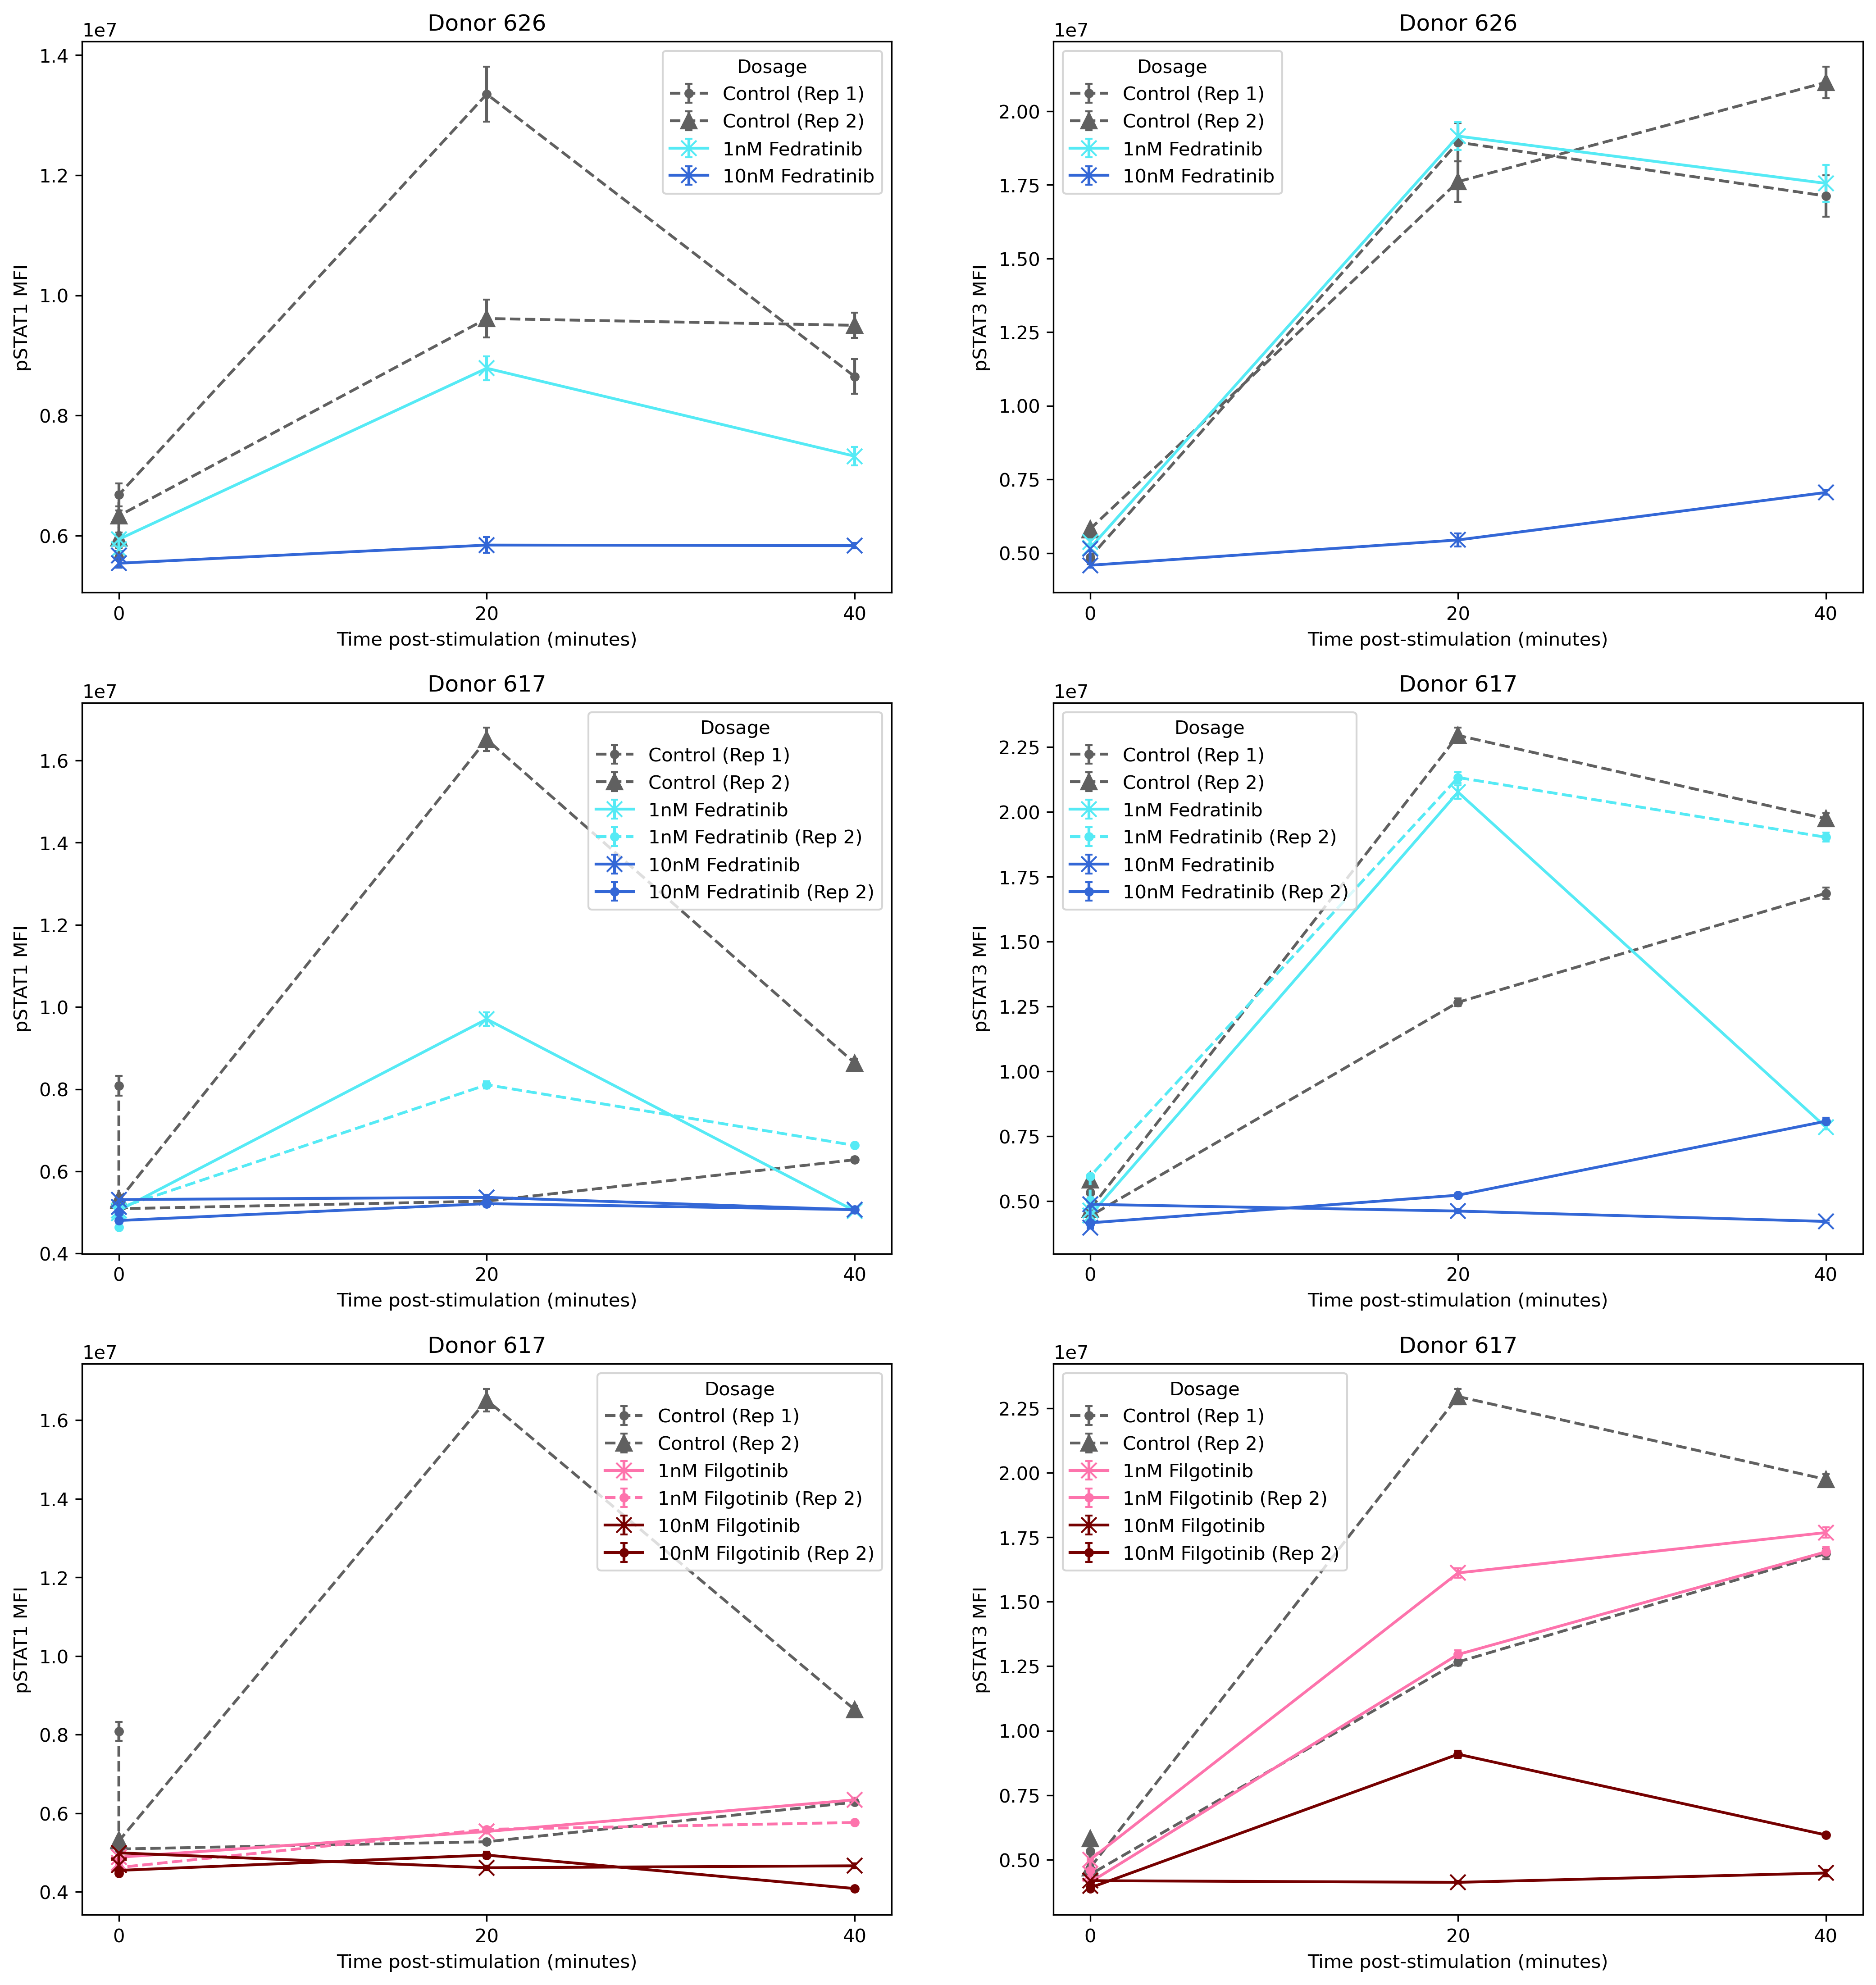

In [59]:
ms = 8 # markersize
color = "#606060"

fig1, axs = plt.subplots(3,2, figsize=(17,18), dpi=300)

stat1_ax = axs[0][0]
stat3_ax = axs[0][1]


df = stat_df[stat_df["PatientId"] == 626]

temp = df[df["JAK Inhibitor"] == "Control"]
# Plot control
temp_rep1 = temp[temp["Column"] < 7]
stat1_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT1 Mean"], yerr=temp_rep1["STAT1 SEM"],
			marker=".", ms=ms, color=color,
			ls="--", label=f"Control (Rep 1)", capsize=2)
stat3_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT3 Mean"], yerr=temp_rep1["STAT3 SEM"],
			marker=".", ms=ms, color=color,
			ls="--", label=f"Control (Rep 1)", capsize=2)

temp_rep2 = temp[temp["Column"] > 6]
stat1_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT1 Mean"], yerr=temp_rep2["STAT1 SEM"],
			marker="^", ms=ms, color=color,
			ls="--", label=f"Control (Rep 2)", capsize=2)
stat3_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT3 Mean"], yerr=temp_rep2["STAT3 SEM"],
			marker="^", ms=ms, color=color,
			ls="--", label=f"Control (Rep 2)", capsize=2)

drug = "1nM Fedratinib"
color = "#55EAF5"
temp = df[df["JAK Inhibitor"] == drug]
# Plot control
temp_rep1 = temp[temp["Column"] < 7]
stat1_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT1 Mean"], yerr=temp_rep1["STAT1 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
stat3_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT3 Mean"], yerr=temp_rep1["STAT3 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)

drug = "10nM Fedratinib"
color = "#3367D6"
temp = df[df["JAK Inhibitor"] == drug]

# Plot control
temp_rep1 = temp[temp["Column"] >= 7]
stat1_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT1 Mean"], yerr=temp_rep1["STAT1 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
stat3_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT3 Mean"], yerr=temp_rep1["STAT3 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)

stat1_ax.set_ylabel("pSTAT1 MFI")
stat1_ax.set_xlabel("Time post-stimulation (minutes)")
stat1_ax.legend(title="Dosage")
stat1_ax.set_title("Donor 626")
stat3_ax.set_ylabel("pSTAT3 MFI")
stat3_ax.set_xlabel("Time post-stimulation (minutes)")
stat3_ax.legend(title="Dosage")
stat3_ax.set_title("Donor 626")

######################################################
### DONOR 617 
stat1_ax = axs[1][0]
stat3_ax = axs[1][1]

df = stat_df[stat_df["PatientId"] == 617]
color = "#606060"
temp = df[df["JAK Inhibitor"] == "Control"]
# Plot control
temp_rep1 = temp[temp["Column"] < 7]
stat1_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT1 Mean"], yerr=temp_rep1["STAT1 SEM"],
			marker=".", ms=ms, color=color,
			ls="--", label=f"Control (Rep 1)", capsize=2)
stat3_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT3 Mean"], yerr=temp_rep1["STAT3 SEM"],
			marker=".", ms=ms, color=color,
			ls="--", label=f"Control (Rep 1)", capsize=2)

temp_rep2 = temp[temp["Column"] > 6]
stat1_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT1 Mean"], yerr=temp_rep2["STAT1 SEM"],
			marker="^", ms=ms, color=color,
			ls="--", label=f"Control (Rep 2)", capsize=2)
stat3_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT3 Mean"], yerr=temp_rep2["STAT3 SEM"],
			marker="^", ms=ms, color=color,
			ls="--", label=f"Control (Rep 2)", capsize=2)

drug = "1nM Fedratinib"
color = "#55EAF5"
temp = df[df["JAK Inhibitor"] == drug]
# Plot control
temp_rep1 = temp[temp["Column"] < 7]
stat1_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT1 Mean"], yerr=temp_rep1["STAT1 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
stat3_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT3 Mean"], yerr=temp_rep1["STAT3 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
temp_rep2 = temp[temp["Column"] > 6]
stat1_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT1 Mean"], yerr=temp_rep2["STAT1 SEM"],
			marker=".", ms=ms, color=color,
			ls="--", label=f"{drug} (Rep 2)", capsize=2)
stat3_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT3 Mean"], yerr=temp_rep2["STAT3 SEM"],
			marker=".", ms=ms, color=color,
			ls="--", label=f"{drug} (Rep 2)", capsize=2)

drug = "10nM Fedratinib"
color = "#3367D6"
temp = df[df["JAK Inhibitor"] == drug]
# Plot control
temp_rep1 = temp[temp["Column"] < 7]
stat1_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT1 Mean"], yerr=temp_rep1["STAT1 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
stat3_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT3 Mean"], yerr=temp_rep1["STAT3 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
temp_rep2 = temp[temp["Column"] > 6]
stat1_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT1 Mean"], yerr=temp_rep2["STAT1 SEM"],
			marker=".", ms=ms, color=color,
			ls="-", label=f"{drug} (Rep 2)", capsize=2)
stat3_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT3 Mean"], yerr=temp_rep2["STAT3 SEM"],
			marker=".", ms=ms, color=color,
			ls="-", label=f"{drug} (Rep 2)", capsize=2)

stat1_ax.set_ylabel("pSTAT1 MFI")
stat1_ax.set_xlabel("Time post-stimulation (minutes)")
stat1_ax.legend(title="Dosage")
stat1_ax.set_title("Donor 617")
stat3_ax.set_ylabel("pSTAT3 MFI")
stat3_ax.set_xlabel("Time post-stimulation (minutes)")
stat3_ax.legend(title="Dosage")
stat3_ax.set_title("Donor 617")


stat1_ax = axs[2][0]
stat3_ax = axs[2][1]

df = stat_df[stat_df["PatientId"] == 617]
color = "#606060"
temp = df[df["JAK Inhibitor"] == "Control"]
# Plot control
temp_rep1 = temp[temp["Column"] < 7]
stat1_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT1 Mean"], yerr=temp_rep1["STAT1 SEM"],
			marker=".", ms=ms, color=color,
			ls="--", label=f"Control (Rep 1)", capsize=2)
stat3_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT3 Mean"], yerr=temp_rep1["STAT3 SEM"],
			marker=".", ms=ms, color=color,
			ls="--", label=f"Control (Rep 1)", capsize=2)

temp_rep2 = temp[temp["Column"] > 6]
stat1_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT1 Mean"], yerr=temp_rep2["STAT1 SEM"],
			marker="^", ms=ms, color=color,
			ls="--", label=f"Control (Rep 2)", capsize=2)
stat3_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT3 Mean"], yerr=temp_rep2["STAT3 SEM"],
			marker="^", ms=ms, color=color,
			ls="--", label=f"Control (Rep 2)", capsize=2)

drug = "1nM Filgotinib"
color = "#FD73AC"
temp = df[df["JAK Inhibitor"] == drug]
# Plot control
temp_rep1 = temp[temp["Column"] < 7]
stat1_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT1 Mean"], yerr=temp_rep1["STAT1 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
stat3_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT3 Mean"], yerr=temp_rep1["STAT3 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
temp_rep2 = temp[temp["Column"] > 6]
stat1_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT1 Mean"], yerr=temp_rep2["STAT1 SEM"],
			marker=".", ms=ms, color=color,
			ls="--", label=f"{drug} (Rep 2)", capsize=2)
stat3_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT3 Mean"], yerr=temp_rep2["STAT3 SEM"],
			marker=".", ms=ms, color=color,
			ls="-", label=f"{drug} (Rep 2)", capsize=2)

drug = "10nM Filgotinib"
color = "#750000"
temp = df[df["JAK Inhibitor"] == drug]
# Plot control
temp_rep1 = temp[temp["Column"] < 7]
stat1_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT1 Mean"], yerr=temp_rep1["STAT1 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
stat3_ax.errorbar(x=temp_rep1["Time"], y=temp_rep1["STAT3 Mean"], yerr=temp_rep1["STAT3 SEM"],
			marker="x", ms=ms, color=color,
			ls="-", label=f"{drug}", capsize=2)
temp_rep2 = temp[temp["Column"] > 6]
stat1_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT1 Mean"], yerr=temp_rep2["STAT1 SEM"],
			marker=".", ms=ms, color=color,
			ls="-", label=f"{drug} (Rep 2)", capsize=2)
stat3_ax.errorbar(x=temp_rep2["Time"], y=temp_rep2["STAT3 Mean"], yerr=temp_rep2["STAT3 SEM"],
			marker=".", ms=ms, color=color,
			ls="-", label=f"{drug} (Rep 2)", capsize=2)

stat1_ax.set_ylabel("pSTAT1 MFI")
stat1_ax.set_xlabel("Time post-stimulation (minutes)")
stat1_ax.legend(title="Dosage")
stat1_ax.set_title("Donor 617")
stat3_ax.set_ylabel("pSTAT3 MFI")
stat3_ax.set_xlabel("Time post-stimulation (minutes)")
stat3_ax.legend(title="Dosage")
stat3_ax.set_title("Donor 617")


In [ ]:
manual_ylim = False

og_df = dfs[0]
dose_to_ls = {
	"10 ng/mL": "-",
	"1 ng/mL": "dotted"
}

dose_to_color = {
	"1 ng/mL": "r",
	"10 ng/mL":"b"
}

il6_to_marker = {
	"1 ng/mL": "d",
	"10 ng/mL": "x"
}

replicate_to_marker = {
	1:"o",
	2:"x",
}

ylims = [[[1e6, 6*1e6], [2*1e6, 6*1e6]],
		 [[4*1e5, 6*1e5], [0.7*1e6, 2*1e6]],
		 [[4.5*1e5, 6.5*1e5], [1.2*1e6, 2.2*1e6]]]

ms = 8 # markersize
color = "#505050"
fig1, axs1 = plt.subplots(2,2, figsize=(15,10), dpi=300)
fig2, axs2 = plt.subplots(2,2, figsize=(15,10), dpi=300)
fig3, axs3 = plt.subplots(2,2, figsize=(15,10), dpi=300)
fig4, axs4 = plt.subplots(2,2, figsize=(15,10), dpi=300)

# Select tSTAT measurement
df = og_df[(og_df["STAT"] == "tSTAT")]

for pat, cur_axs in zip(df["PatientId"].unique(), [axs1, axs2, axs3, axs4]):
	# Plot tSTATs from first scan
	stat1_ax = cur_axs[0][0]
	stat3_ax = cur_axs[0][1]
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"]== rep)]
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
	stat1_ax.set_ylabel("MFI")
	stat1_ax.set_xlabel("Time post-stimulation (minutes)")
	stat1_ax.legend(title="Replicate")
	stat1_ax.set_title("tSTAT1")
	stat3_ax.set_ylabel("MFI")
	stat3_ax.set_xlabel("Time post-stimulation (minutes)")
	stat3_ax.legend(title="Replicate")
	stat3_ax.set_title("tSTAT3")
	if manual_ylim:
		stat1_ax.set_ylim(*ylims[0][0])
		stat3_ax.set_ylim(*ylims[0][1])


# Select pSTAT measurement
df = og_df[og_df["STAT"] == "pSTAT"]

for pat, cur_axs in zip(df["PatientId"].unique(), [axs1, axs2, axs3, axs4]):
	# Plot tSTATs from first scan
	stat1_ax = cur_axs[1][0]
	stat3_ax = cur_axs[1][1]
	#for il6 in df["IL-6 Concentration"].unique():
	for rep in df["Replicate"].unique():
		select_df = df.loc[(df["PatientId"] == pat) & (df["Replicate"] == rep)]
		stat1_ax.errorbar(x=select_df["Time"], y=select_df["STAT1 Mean"], yerr=select_df["STAT1 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
		
		stat3_ax.errorbar(x=select_df["Time"], y=select_df["STAT3 Mean"], yerr=select_df["STAT3 SEM"],
					marker=replicate_to_marker[rep], ms=ms, color=color,
					ls="-", label=f"{rep}", capsize=2)
	stat1_ax.set_ylabel("MFI")
	stat1_ax.set_xlabel("Time post-stimulation (minutes)")
	stat1_ax.legend(title="Replicate")
	stat1_ax.set_title("pSTAT1")
	stat3_ax.set_ylabel("MFI")
	stat3_ax.set_xlabel("Time post-stimulation (minutes)")
	stat3_ax.legend(title="Replicate")
	stat3_ax.set_title("pSTAT3")
	if manual_ylim:
		stat1_ax.set_ylim(*ylims[1][0])
		stat3_ax.set_ylim(*ylims[1][1])

id1 = df["PatientId"].unique()[0]
id2 = df["PatientId"].unique()[1]
id3 = df["PatientId"].unique()[2]
id4 = df["PatientId"].unique()[3]

fig1.suptitle(f"Patient {id1}")
fig2.suptitle(f"Patient {id2}");
fig3.suptitle(f"Patient {id3}")
fig4.suptitle(f"Patient {id4}")


In [ ]:
ms = 8 # markersize
color = "#505050"

stat_df = og_df.loc[(og_df["PatientId"] == 6170)]


# Select pSTAT measurement
pdf = stat_df[stat_df["STAT"] == "pSTAT"]
tdf = stat_df[stat_df["STAT"] == "tSTAT"]

# Dropping the last well (due to exp error)
tdf = tdf[tdf["Time"] != "90"]

fig, axs = plt.subplots(1, 2, figsize=(12,5), dpi=150)

axs[0].errorbar(x=pdf["Time"], y=pdf["STAT1 Mean"], yerr=pdf["STAT1 SEM"],
					marker="o", ms=ms, color=color,
					ls="-", label=f"STAT1", capsize=2)
		
axs[0].errorbar(x=pdf["Time"], y=pdf["STAT3 Mean"], yerr=pdf["STAT3 SEM"],
					marker="^", ms=ms, color=color,
					ls="-", label=f"STAT3", capsize=2)

axs[0].set_ylabel("MFI")
axs[0].set_xlabel("Time post-stimulation (minutes)")
axs[0].legend()
axs[0].set_title("pSTAT")

axs[1].errorbar(x=tdf["Time"], y=tdf["STAT1 Mean"], yerr=tdf["STAT1 SEM"],
					marker="o", ms=ms, color=color,
					ls="-", label=f"STAT1", capsize=2)
		
axs[1].errorbar(x=tdf["Time"], y=tdf["STAT3 Mean"], yerr=tdf["STAT3 SEM"],
					marker="^", ms=ms, color=color,
					ls="-", label=f"STAT3", capsize=2)

axs[1].set_ylabel("MFI")
axs[1].set_xlabel("Time post-stimulation (minutes)")
axs[1].legend()
axs[1].set_title("tSTAT")

plt.suptitle("IFNB Stimulation (10 ng/mL) with Donor 617")